# Linear regression using SKLearn on your own Data!

This should look familiar... we now are going to use linear regression on some of our own features. I recommend walking through the code below first, then importing your dataset and working through the same problem with your data!



In [1]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
from sklearn.linear_model import LinearRegression

# Data Loading, Cleaning, and Setup



Read in your data into a pandas dataframe by replacing the `filename` variable with your file's path. You can also use the current code below to work on a mpg dataset, where the target variable we are predicting is **miles per gallon** based on other car features. 

> We should choose two columns that we want to run regresssion on. Use the `.head()` function to decide which columns would be best!



pandas docs - https://pandas.pydata.org/docs/reference/index.html#api <br>
seaborn docs - https://seaborn.pydata.org/api.html

In [2]:
filename = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
my_data = pd.read_csv(filename) #TODO: read in your file by replacing the filename variable with your file's path. You can also use this current code to work on an automobile dataset! 

In [3]:
my_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
#cleaning the data -- dropping missing and duplicate values for sanity
my_data.dropna(inplace = True)
my_data.drop_duplicates(inplace = True)
my_data = my_data.reset_index(drop=True)

length = len(my_data.index) #save length of array of later

Linear regression naturally works best on highly correlated data, so I'm going to create a heatmap to see which variables are correlated! 



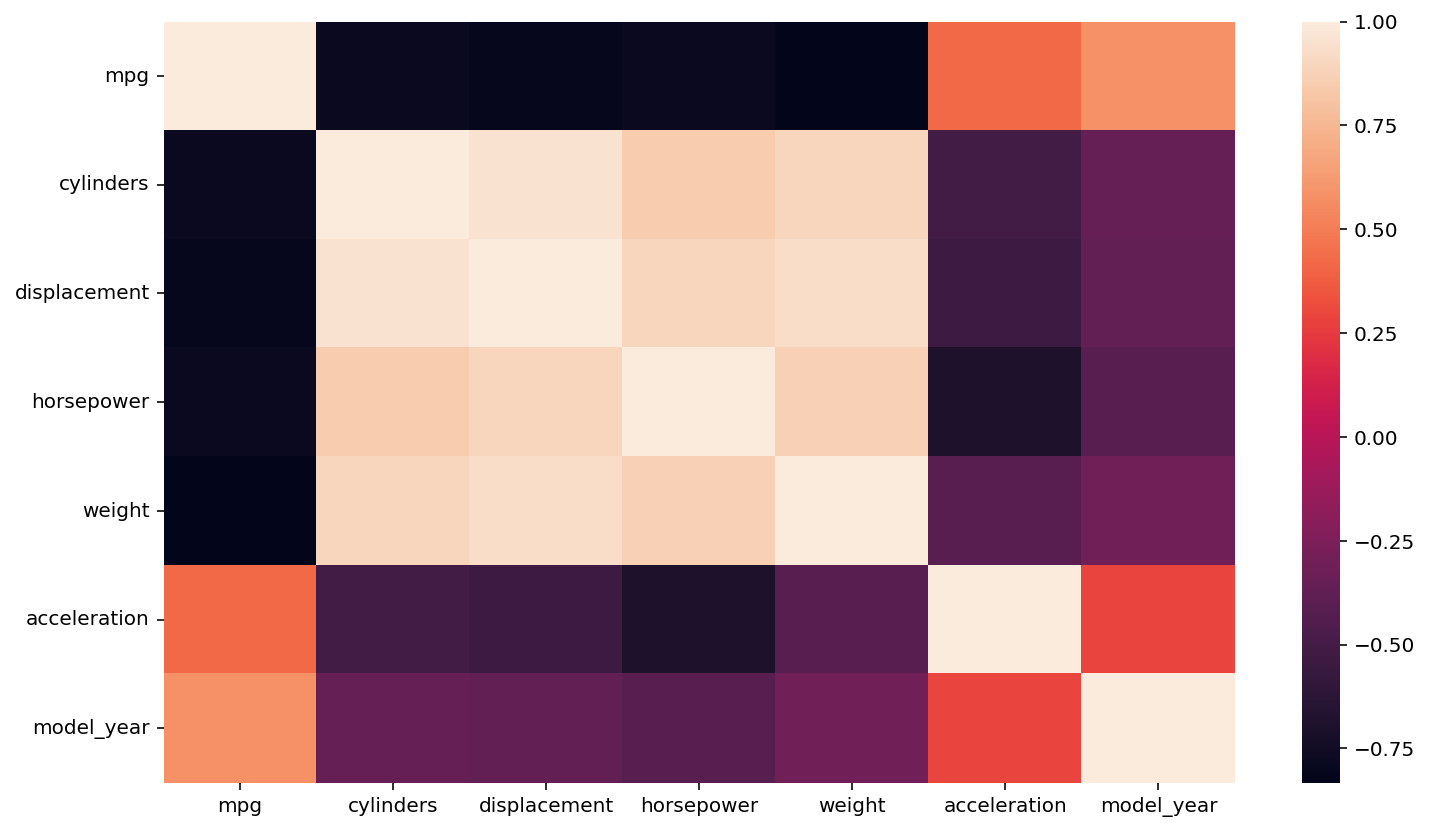

In [129]:
sns.heatmap(my_data.corr())

### Getting to know the problem

For my data, my columns inlude `'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', and 'name'`. 

To start, I would like to create a linear regression model that uses horsepower (X) to predict miles per gallon (y) and see how strong our linear regression model is. For your data, you should choose two columns as well to represent X and y.



In [6]:
X = my_data["horsepower"]

In [7]:
X

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
387     86.0
388     52.0
389     84.0
390     79.0
391     82.0
Name: horsepower, Length: 392, dtype: float64

In [8]:
type(X)

pandas.core.series.Series

In [9]:
X.to_numpy()

array([130., 165., 150., 150., 140., 198., 220., 215., 225., 190., 170.,
       160., 150., 225.,  95.,  95.,  97.,  85.,  88.,  46.,  87.,  90.,
        95., 113.,  90., 215., 200., 210., 193.,  88.,  90.,  95., 100.,
       105., 100.,  88., 100., 165., 175., 153., 150., 180., 170., 175.,
       110.,  72., 100.,  88.,  86.,  90.,  70.,  76.,  65.,  69.,  60.,
        70.,  95.,  80.,  54.,  90.,  86., 165., 175., 150., 153., 150.,
       208., 155., 160., 190.,  97., 150., 130., 140., 150., 112.,  76.,
        87.,  69.,  86.,  92.,  97.,  80.,  88., 175., 150., 145., 137.,
       150., 198., 150., 158., 150., 215., 225., 175., 105., 100., 100.,
        88.,  95.,  46., 150., 167., 170., 180., 100.,  88.,  72.,  94.,
        90.,  85., 107.,  90., 145., 230.,  49.,  75.,  91., 112., 150.,
       110., 122., 180.,  95., 100., 100.,  67.,  80.,  65.,  75., 100.,
       110., 105., 140., 150., 150., 140., 150.,  83.,  67.,  78.,  52.,
        61.,  75.,  75.,  75.,  97.,  93.,  67.,  9

In [10]:
type(X.to_numpy())

numpy.ndarray

In [11]:
X = my_data["horsepower"].to_numpy()
y = my_data["mpg"].to_numpy()

In [136]:
X

array([130., 165., 150., 150., 140., 198., 220., 215., 225., 190., 170.,
       160., 150., 225.,  95.,  95.,  97.,  85.,  88.,  46.,  87.,  90.,
        95., 113.,  90., 215., 200., 210., 193.,  88.,  90.,  95., 100.,
       105., 100.,  88., 100., 165., 175., 153., 150., 180., 170., 175.,
       110.,  72., 100.,  88.,  86.,  90.,  70.,  76.,  65.,  69.,  60.,
        70.,  95.,  80.,  54.,  90.,  86., 165., 175., 150., 153., 150.,
       208., 155., 160., 190.,  97., 150., 130., 140., 150., 112.,  76.,
        87.,  69.,  86.,  92.,  97.,  80.,  88., 175., 150., 145., 137.,
       150., 198., 150., 158., 150., 215., 225., 175., 105., 100., 100.,
        88.,  95.,  46., 150., 167., 170., 180., 100.,  88.,  72.,  94.,
        90.,  85., 107.,  90., 145., 230.,  49.,  75.,  91., 112., 150.,
       110., 122., 180.,  95., 100., 100.,  67.,  80.,  65.,  75., 100.,
       110., 105., 140., 150., 150., 140., 150.,  83.,  67.,  78.,  52.,
        61.,  75.,  75.,  75.,  97.,  93.,  67.,  9

# Linear Regression with Scikit-learn's linear regression

We can use Scikit-Learn’s Linear Regression to fit the model. Most other models we will use in the course 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Split the data
Our model should ignore 20% of data points to use for testing so it doesn't just memorize the data. We need to make sure there are no missing data points before continuing.

In [13]:
X.shape

(392,)

In [14]:
y.shape

(392,)

np docs - https://numpy.org/doc/stable/reference/index.html#reference



In [15]:
idx = np.arange(len(X))

In [140]:
idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [16]:
np.random.shuffle(idx)

In [142]:
idx

array([134,  79, 367,  15,  94, 239, 348, 157,  47, 231, 264, 324, 205,
        45, 349, 313, 224,  52, 336,  14,  81, 213, 329,  67, 362, 332,
       203, 135,  38,  75, 187, 177,  69, 364, 220,  68, 237, 191, 137,
       340, 120,  33,  26,  50, 373, 233, 261, 254, 152,  58, 310,  48,
       140,  35, 219, 230, 139, 301,  22, 291,   8, 240,  95, 114,  88,
        70, 182, 371, 377,  31,  62,  49, 109, 199, 143, 304, 350, 337,
       190,  10, 131, 328, 144, 223, 338, 113, 321, 215, 141, 327,  16,
         4, 248,  20, 322, 102, 208, 307, 194,  72,  66, 345, 115,  11,
       163, 189,  32, 193, 282, 330, 228, 303, 323, 178, 380, 369, 302,
       164,  42, 130, 316, 234, 267, 173, 117,  73, 162,  18, 379,  40,
       320, 346, 180,  30, 242, 358, 170, 262, 166, 108, 161,  44, 389,
       142, 101, 210, 279, 192, 222, 381, 127, 243, 274, 172, 383, 247,
       295,   6, 280, 273, 151, 318, 165, 365, 342, 258, 355,  57,  78,
       251, 384,  51, 269, 288, 146,  60,  41,  97,  89, 103, 35

decide size of train set


In [143]:
len(X) * 0.8

313.6

In [17]:
split_threshold = int(len(X) * 0.8)

In [18]:
split_threshold

313

In [19]:
train_idx = idx[:split_threshold]

In [20]:
test_idx = idx[split_threshold:]

In [21]:
len(test_idx)

79

In [22]:
x_train = X[train_idx]

In [23]:
x_train

array([140.,  75., 115., 120., 100.,  86., 150.,  88.,  70., 140.,  85.,
       125., 110.,  97., 152., 110.,  95.,  88., 100.,  95.,  67.,  60.,
        86.,  95., 110.,  70., 215.,  77.,  95.,  83., 150.,  88.,  85.,
       130.,  92., 120.,  58., 125.,  63.,  67.,  90., 105., 125., 100.,
        67., 112.,  80., 110., 150.,  82.,  90.,  95., 150.,  83.,  78.,
        88.,  69.,  68.,  88., 105., 148.,  88., 113.,  61.,  97.,  67.,
        90.,  65., 105.,  97., 165.,  84.,  95., 110.,  76., 133.,  95.,
        88., 198., 129., 145.,  70., 105., 100.,  85.,  98., 130.,  70.,
        75.,  88.,  90.,  80.,  85.,  88.,  52., 140., 140.,  83., 110.,
       130., 170., 180.,  84.,  92., 150., 115., 150.,  85., 153.,  85.,
        72.,  72.,  88.,  89.,  88., 170., 100., 100.,  92.,  90.,  71.,
        96.,  67., 145.,  92., 160.,  94.,  88., 112., 103.,  76.,  95.,
        85., 100., 167., 180.,  65., 110.,  95.,  65.,  90.,  66., 130.,
       110.,  84.,  80.,  68.,  90.,  75., 175.,  9

In [24]:
y_train = y[train_idx]

In [27]:
y_test= y[test_idx]

In [26]:
x_test = X[test_idx]

Reshape data


In [28]:
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [155]:
# Checking for Missing Data
if X.shape[0] != y.shape[0]:
  print("It looks like you have missing data. You may want to preprocess your data more with pandas to delete any rows with missing, NaN, N/A, and null values.")
  
idx = np.arange(length) #shuffle our dataset indices so we don't always split the same way!
np.random.shuffle(idx)

#split our data with 80% for training (learning) and 20% for testing.
split_threshold = int(length * 0.8)

train_idx = idx[:split_threshold]
# Uses the remaining indices for testing
test_idx = idx[split_threshold:]

# Generates train and test sets and formats them for training.
x_train, y_train = X[train_idx], y[train_idx]
x_test, y_test = X[test_idx], y[test_idx]
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

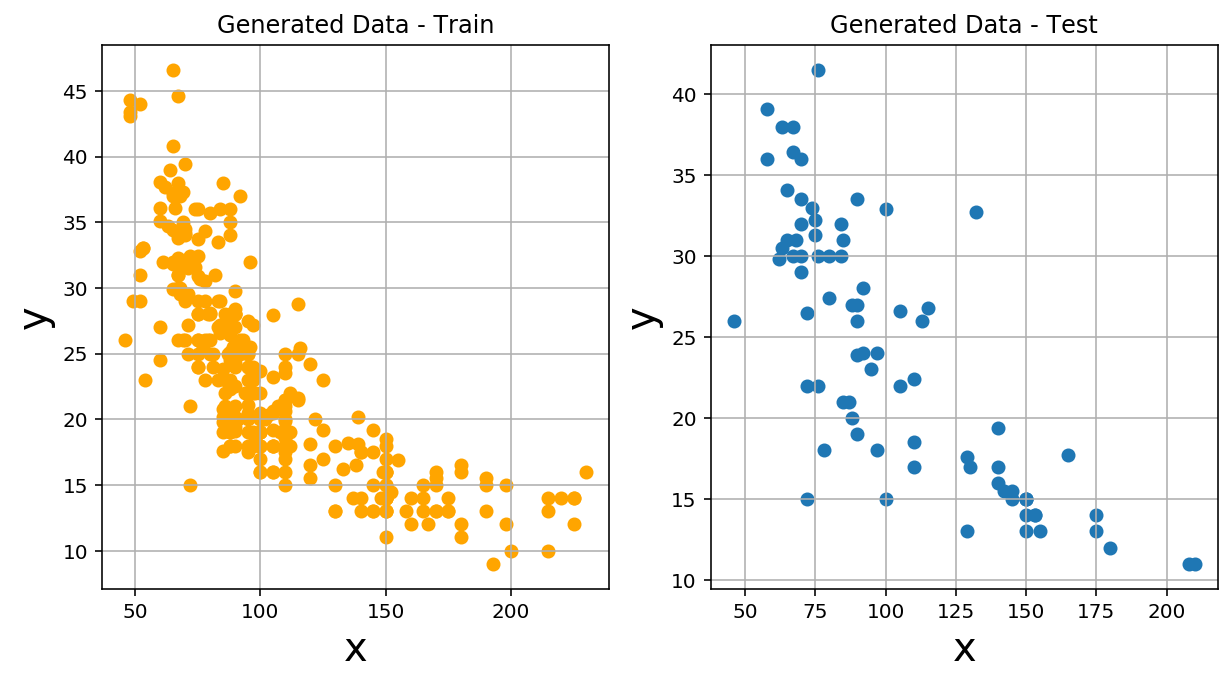

In [156]:
#let's plot our split data to see how it looks!
plt.figure(figsize=(10,5))

# plot the train set 
plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

# plot the test set 
plt.subplot(1,2,2)
plt.scatter(x_test, y_test)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

### Creating and Fitting

In [29]:
#Create the model object
linr = LinearRegression()

In [30]:
type(linr)

sklearn.linear_model._base.LinearRegression

In [31]:
linr.fit(x_train, y_train)

LinearRegression()

In [32]:
print(linr.intercept_, linr.coef_[0])

[39.66403619] [-0.15573376]


In [163]:
print(linr.intercept_, linr.coef_)

[39.54477916] [[-0.15513343]]


### Creating Predictions
Predict outputs on our x_test data that we held out. Think of this as a way to see how the model does on new data!

In [34]:
# Predicting using SKLearn
y_hat = linr.predict(x_test)

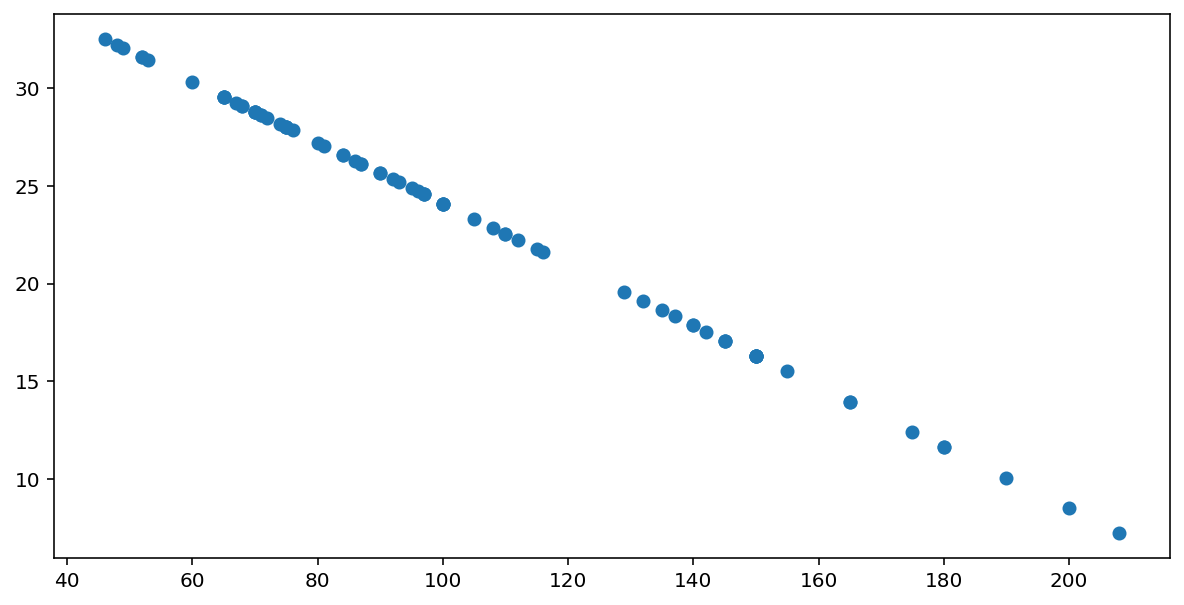

In [35]:
#plotting results
plt.figure(figsize=(10,5))
plt.scatter(x_test, y_hat)


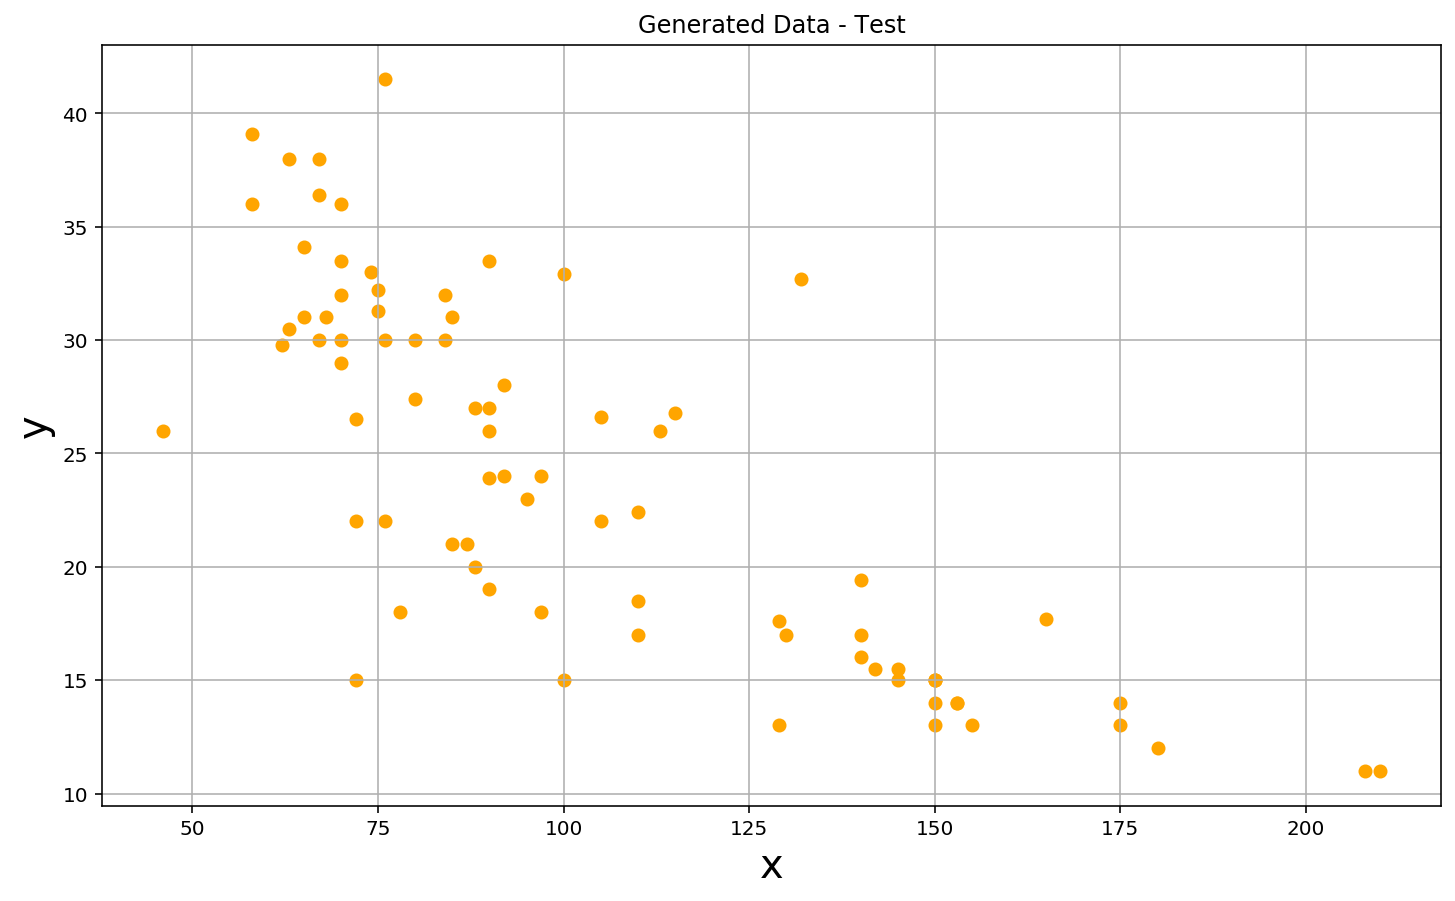

In [167]:
plt.scatter(x_test,y_test, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

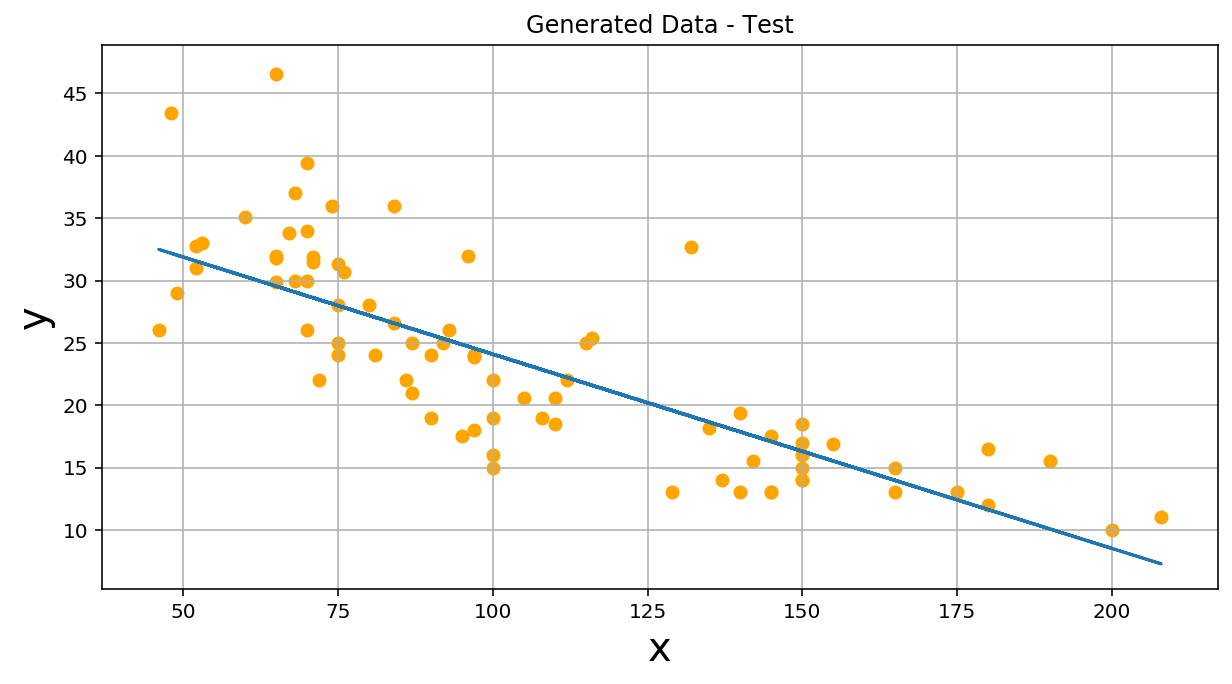

In [36]:

#plotting results
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat,)

plt.scatter(x_test,y_test, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

### Results and Evaluation
One way to see if the model is pretty good is the coefficient of determination (R^2) using the `score()` function. You can read about it here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score.

Another way is to compare our mean absolute error (MAE). MAE measures the prediction error. Mathematically, it is the average absolute difference between observed and predicted outcomes, MAE = mean(abs(observeds - predicteds)). MAE is less sensitive to outliers compared to RMSE.

Read some more about regression model metrics [here](http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/).

In [170]:
print(linr.score(x_test, y_test))

0.6139399987919832


In [37]:
MAE = np.mean(abs(y_test - y_hat))
MAE

8.377401324565882

# Repeat the process!
Try running linear regression on multiple combinations of features (columns) on your dataset. What combination yields the best score? How does this connect to your correlation chart? 